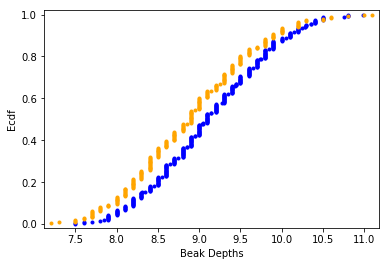

In [15]:
                                        #BEAK DEPTHS


#Ecdf of beak depths

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('finch_beaks_1975.csv')
df2=pd.read_csv('finch_beaks_2012.csv')

#bd_1975 =beak depth in the year 1975
#bd_2012 =beak depth in the year 2012

bd_1975=df1['Beak depth, mm']
bd_2012=df2['bdepth']

#Defining an Ecdf function

def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

#Compute Ecdf

x_1975,y_1975=ecdf(bd_1975)
x_2012,y_2012=ecdf(bd_2012)

#Plotting the Ecdfs

_=plt.plot(x_1975,y_1975,marker='.',linestyle='none',color='blue')
_=plt.plot(x_2012,y_2012,marker='.',linestyle='none',color='orange')

#Setting margin

_=plt.margins(0.02)

#labelling axis

_=plt.xlabel('Beak Depths')
_=plt.ylabel('Ecdf')

plt.show()


In [16]:
#Paramter estimation of beak depths

#Calculating the mean diff between beak depth in the year 1975 and 2012

mean_diff=np.mean(bd_1975)-np.mean(bd_2012)

#defining bootstrap replicate function

def bootstrap_replicate(data,func):
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)

#Getting bootstrap replicate of the mean

bd_replicate_1975=np.empty(10000)
bd_replicate_1975=np.empty(10000)
for i in range(10000):
    bd_replicate_1975=bootstrap_replicate(bd_1975,np.mean)
    bd_replicate_2012=bootstrap_replicate(bd_2012,np.mean)

    
bd_diff_replicates=bd_replicate_1975-bd_replicate_2012

#Computing 95% confidence interval

conf_int=np.percentile(bd_diff_replicates,[2.5,97.5])
conf_int

array([ 0.213933,  0.213933])

In [25]:
#Hypothesis test: Are beaks deeper in the year 2012.
#Hypothesis is that the means are equal

#Calculating the combined mean

combined_mean=np.mean(np.concatenate((bd_1975,bd_2012)))

#Shift the samples

bd_1975_shifted=bd_1975-np.mean(bd_1975)+combined_mean
bd_2012_shifted=bd_2012-np.mean(bd_2012)+combined_mean

#Bootstrap replicates of the shifted data sets

bd_replicates_1975_shifted=np.empty(10000)
bd_replicates_2012_shifted=np.empty(10000)
for i in range(10000):
    bd_replicates_1975_shifted[i]=bootstrap_replicate(bd_1975_shifted,np.mean)
    bd_replicates_2012_shifted[i]=bootstrap_replicate(bd_2012_shifted,np.mean)

    
#Bootstrap replicate of the difference

bd_diff_replicates_shifted=bd_replicates_2012_shifted-bd_replicates_1975_shifted

#Calculating the p value

p=np.sum(bd_diff_replicates_shifted>=mean_diff)/len(bd_diff_replicates_shifted)
p

0.00020000000000000001

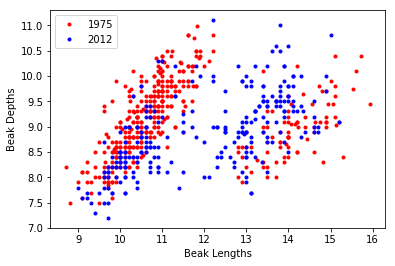

In [51]:
                                    #BEAK SHAPES
    
#Eda of beak length and beak depths
bl_1975=df1['Beak length, mm']
bl_2012=df2['blength']

#Scatter plot of 1975 data

_=plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',color='red')

#Scatter plot of the 2012 data

_=plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',color='blue')

#labelling the axis

_=plt.xlabel('Beak Lengths')
_=plt.ylabel('Beak Depths')

#Adding legend to the plot

_=plt.legend(('1975','2012'),loc='upper left')

plt.show()

In [67]:
#Linear Regression

#Computing the linear regression

slope_1975,intercept_1975=np.polyfit(bl_1975,bd_1975,1)
slope_2012,intercept_2012=np.polyfit(bl_2012,bd_2012,1)

#Defining function for pair bootstrap

def draw_bs_pairs_bootstrap(x,y,size=1):
    inds=np.arange(len(x))
    bs_slope_rep=np.empty(size)
    bs_intercept_rep=np.empty(size)
    for i in range(1000):
        bs_inds=np.random.choice(inds,len(inds))
        bs_x,bs_y=x[bs_inds],y[bs_inds]
        bs_slope_rep[i],bs_intercept_rep[i]=np.polyfit(bs_x,bs_y,1)
    return bs_slope_rep,bs_intercept_rep

#Pair bootstrap for the linear regresion

bs_slope_rep_1975,bs_intercept_rep_1975=draw_bs_pairs_bootstrap(bl_1975,bd_1975,1000)
bs_slope_rep_2012,bs_intercept_rep_2012=draw_bs_pairs_bootstrap(bl_2012,bd_2012,1000)

#95% confidence interval for slopes and intercepts for 1975 and 2012

conf_int_slope_1975=np.percentile(bs_slope_rep_1975,[2.5,97.5])
conf_int_intercept_1975=np.percentile(bs_intercept_rep_1975,[2.5,97.5])

conf_int_slope_2012=np.percentile(bs_slope_rep_2012,[2.5,97.5])
conf_int_intercept_2012=np.percentile(bs_intercept_rep_2012,[2.5,97.5])

dict={'slope of the year 1975 is':slope_1975, '95% Confidence Interval 1975': conf_int_slope_1975,
      'slope of the year 2012 is':slope_2012, '95% Confidence Interval 2012': conf_int_slope_2012,
      'Intercept of the year 1975 is':intercept_1975, '95% Confidence Interval 1975': conf_int_intercept_1975,
      'Intercept of the year 2012 is':intercept_2012, '95% Confidence Interval 2012': conf_int_intercept_2012
     }
dict

{'95% Confidence Interval 1975': array([ 7.58252094,  8.45818443]),
 '95% Confidence Interval 2012': array([ 5.0761808 ,  6.03942033]),
 'Intercept of the year 1975 is': 8.0539079807164242,
 'Intercept of the year 2012 is': 5.5485592046123164,
 'slope of the year 1975 is': 0.094596832089211602,
 'slope of the year 2012 is': 0.27942148396112482}

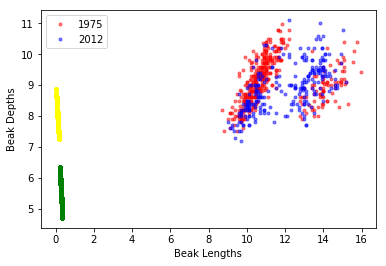

In [70]:
#Displaying Linear Regression

_=plt.plot(bl_1975,bd_1975,marker='.',linestyle='none',color='red',alpha=0.5)

#Scatter plot of the 2012 data

_=plt.plot(bl_2012,bd_2012,marker='.',linestyle='none',color='blue',alpha=0.5)

#labelling the axis

_=plt.xlabel('Beak Lengths')
_=plt.ylabel('Beak Depths')

#Adding legend to the plot

_=plt.legend(('1975','2012'),loc='upper left')

#Generate x values for the bootstrap lines

x=np.array([10,17])

#Plotting the bootstrap lines

for i in range(100):
    plt.plot(bs_slope_rep_1975,bs_intercept_rep_1975,marker='.',linestyle='none',color='yellow')
    plt.plot(bs_slope_rep_2012,bs_intercept_rep_2012,marker='.',linestyle='none',color='green')
    
plt.show()    
    

In [34]:
#Beak length to depth ratio

ratio_1975= bl_1975/bd_1975
ratio_2012= bl_2012/bd_2012

#Computing means

mean_ratio_1975=np.mean(ratio_1975)
mean_ratio_2012=np.mean(ratio_2012)

#Generating bootstrap replicates of the mean

bs_replicates_1975=np.empty(10000)
bs_replicates_2012=np.empty(10000)
for i in range(10000):
    bs_replicates_1975[i]=bootstrap_replicate(ratio_1975,np.mean)
    bs_replicates_2012[i]=bootstrap_replicate(ratio_2012,np.mean)
    

#Calculating 95% bootstrap confidence Interval

conf_int_1975=np.percentile(bs_replicates_1975,[2.5,97.5])
conf_int_2012=np.percentile(bs_replicates_2012,[2.5,97.5])
list=[conf_int_1975,conf_int_2012]
list




[array([ 1.22864401,  1.26395741]), array([ 1.330188  ,  1.36668923])]

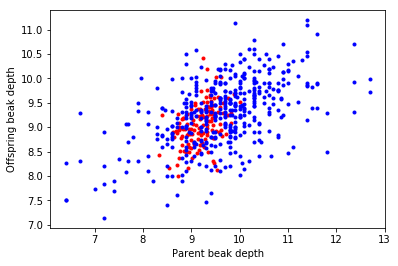

In [10]:
                                #Calculation of heritability
    
import pandas as pd
import matplotlib.pyplot as plt

df3=pd.read_csv('scandens_beak_depth_heredity.csv')
df4=pd.read_csv('fortis_beak_depth_heredity.csv')
bd_parent_scandens=df3['mid_parent']
bd_offspring_scandens=df3['mid_offspring']
bd_parent_fortis=df4['Male BD']
bd_offspring_fortis=df4['Mid-offspr']

#Make Scatter plot

_=plt.plot(bd_parent_scandens,bd_offspring_scandens,marker='.',linestyle='none',color='red')
_=plt.plot(bd_parent_fortis,bd_offspring_fortis,marker='.',linestyle='none',color='blue')

#Labelling the axes

_=plt.xlabel('Parent beak depth')
_=plt.ylabel('Offspring beak depth')

plt.show()